# INM433 Visual Analytics Final assignment
## An Analysis of Time Higher Education World University Ranking: A Visual Analytics Approach
### Valli Ramaswamy, Ho Yin Tam

Import the libraries.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
pd.set_option('display.max_columns', None)

Load the dataset.

In [31]:
uniranking = pd.read_csv('rank_from2011to2023_cleaned.csv', encoding='ISO-8859-1')
uniranking

,Year,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited
0,2011,1,1,Harvard University,96.1,1,99.7,1,72.4,49,34.5,105,98.7,2,98.8,8,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False
1,2011,2,2,California Institute of Technology,96.0,2,97.7,4,54.6,93,83.7,24,98.0,4,99.9,1,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
2,2011,3,3,Massachusetts Institute of Technology,95.6,3,97.8,3,82.3,36,87.5,21,91.4,11,99.9,2,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False
3,2011,4,4,Stanford University,94.3,4,98.3,2,29.5,156,64.3,33,98.1,3,99.2,6,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
4,2011,5,5,Princeton University,94.2,5,90.9,6,70.3,53,-,164,95.4,5,99.9,3,United States,Princeton University,"Languages, Literature & Linguistics,Biological...",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,2023,1960,196,University of Erlangen-Nuremberg,54.5,1960,44.6,165,53.5,596,90.7,63,47.5,151,68.8,507,Germany,University of Erlangen-Nuremberg,"Archaeology,Computer Science,Sport Science,Bio...",False,False
2596,2023,1970,196,Sichuan University,54.5,1970,57.1,71,38.7,993,93.4,50,58.6,87,48.6,881,China,Sichuan University,"Mathematics & Statistics,Biological Sciences,L...",False,False
2597,2023,1980,198,Durham University,54.4,1980,40.0,234,94.3,57,39.4,1043,44.6,180,70.0,485,United Kingdom,Durham University united kingdom UK England,"Business & Management,Civil Engineering,Chemis...",False,False
2598,2023,1990,198,Queen??s University Belfast,54.4,1990,31.1,483,97.4,18,41.6,793,37.9,264,84.4,243,United Kingdom,Queen??s University Belfast qub queen&#039;s,"Psychology,Accounting & Finance,Law,Economics ...",False,False


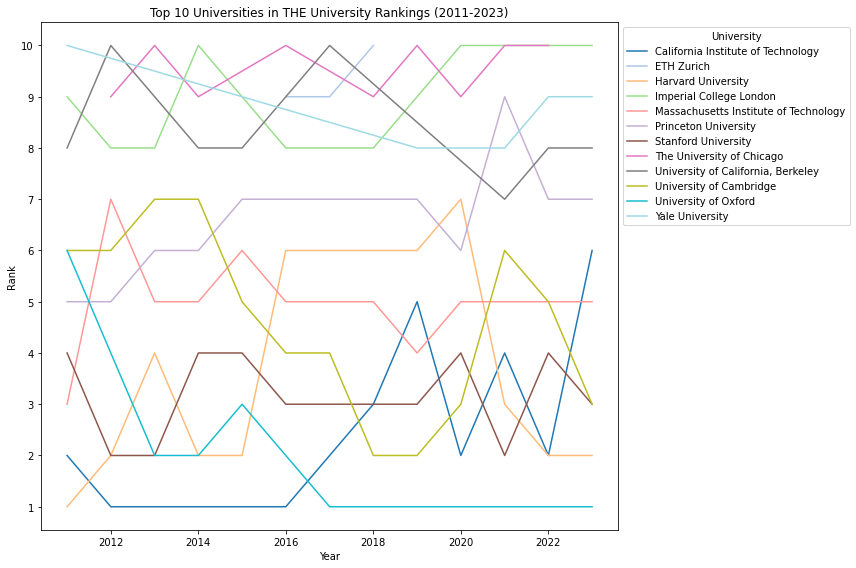

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Assuming the dataset has columns 'Year', 'name', and 'rank'
# If not, adjust the column names accordingly

# Convert 'Year' column to datetime format
uniranking['Year'] = pd.to_datetime(uniranking['Year'], format='%Y')

# Select the top 10 universities for each year
top_10_universities = uniranking.groupby('Year').apply(lambda x: x.nsmallest(10, 'rank')).reset_index(drop=True)

# Create a line graph with distinct colors for each university
fig, ax = plt.subplots(figsize=(12, 8))

# Get a colormap with as many colors as there are universities
cmap = get_cmap('tab20', len(top_10_universities['name'].unique()))

for i, (university, data) in enumerate(top_10_universities.groupby('name')):
    color = cmap(i)
    ax.plot(data['Year'], data['rank'], label=university, color=color)

ax.set_title('Top 10 Universities in THE University Rankings (2011-2023)')
ax.set_xlabel('Year')
ax.set_ylabel('Rank')
ax.set_yticks(range(1, 11))
ax.legend(title='University', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


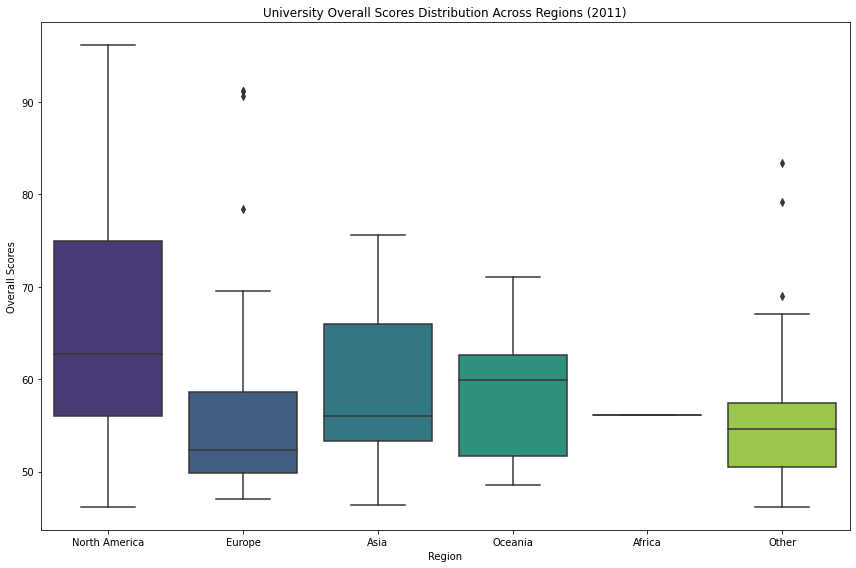

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset has columns 'Year', 'name', 'scores_overall', and 'location'
# If not, adjust the column names accordingly

# Define a mapping from countries to regions
region_mapping = {
    'North America': ['United States', 'Canada'],
    'Europe': ['United Kingdom', 'Germany', 'France', 'Italy', 'Spain', 'Netherlands'],  # Add more countries as needed
    'Asia': ['China', 'Japan', 'India', 'South Korea', 'Singapore'],  # Add more countries as needed
    'Oceania': ['Australia', 'New Zealand'],
    'Latin America': ['Brazil', 'Mexico', 'Argentina'],  # Add more countries as needed
    'Africa': ['South Africa', 'Nigeria', 'Kenya']  # Add more countries as needed
}

# Convert 'Year' column to datetime format
uniranking['Year'] = pd.to_datetime(uniranking['Year'], format='%Y')

# Function to map countries to regions
def map_to_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region
    return 'Other'

# Create a new 'region' column
uniranking['region'] = uniranking['location'].apply(map_to_region)

# Filter the dataframe for the year 2011
uniranking_2011 = uniranking[uniranking['Year'] == '2011']

# Define the order of regions
region_order = ['North America', 'Europe', 'Asia', 'Oceania', 'Africa', 'Other']

# Create a box plot for scores_overall distribution across regions in the year 2011 with specified order
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(x='region', y='scores_overall', data=uniranking_2011, ax=ax, palette='viridis', order=region_order)

ax.set_title('University Overall Scores Distribution Across Regions (2011)')
ax.set_xlabel('Region')
ax.set_ylabel('Overall Scores')
plt.tight_layout()
plt.show()


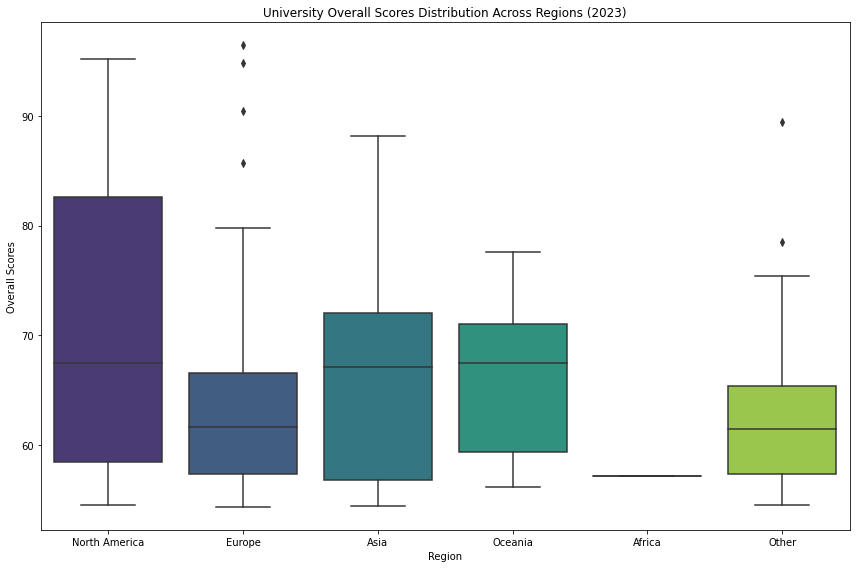

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset has columns 'Year', 'name', 'scores_overall', and 'location'
# If not, adjust the column names accordingly

# Define a mapping from countries to regions
region_mapping = {
    'North America': ['United States', 'Canada'],
    'Europe': ['United Kingdom', 'Germany', 'France', 'Italy', 'Spain', 'Netherlands'],  # Add more countries as needed
    'Asia': ['China', 'Japan', 'India', 'South Korea', 'Singapore'],  # Add more countries as needed
    'Oceania': ['Australia', 'New Zealand'],
    'Latin America': ['Brazil', 'Mexico', 'Argentina'],  # Add more countries as needed
    'Africa': ['South Africa', 'Nigeria', 'Kenya']  # Add more countries as needed
}

# Convert 'Year' column to datetime format
uniranking['Year'] = pd.to_datetime(uniranking['Year'], format='%Y')

# Function to map countries to regions
def map_to_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region
    return 'Other'

# Create a new 'region' column
uniranking['region'] = uniranking['location'].apply(map_to_region)

# Filter the dataframe for the year 2023
uniranking_2023 = uniranking[uniranking['Year'] == '2023']

# Define the order of regions
region_order = ['North America', 'Europe', 'Asia', 'Oceania','Africa', 'Other']

# Create a box plot for scores_overall distribution across regions in the year 2023 with specified order
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(x='region', y='scores_overall', data=uniranking_2023, ax=ax, palette='viridis', order=region_order)

ax.set_title('University Overall Scores Distribution Across Regions (2023)')
ax.set_xlabel('Region')
ax.set_ylabel('Overall Scores')
plt.tight_layout()
plt.show()


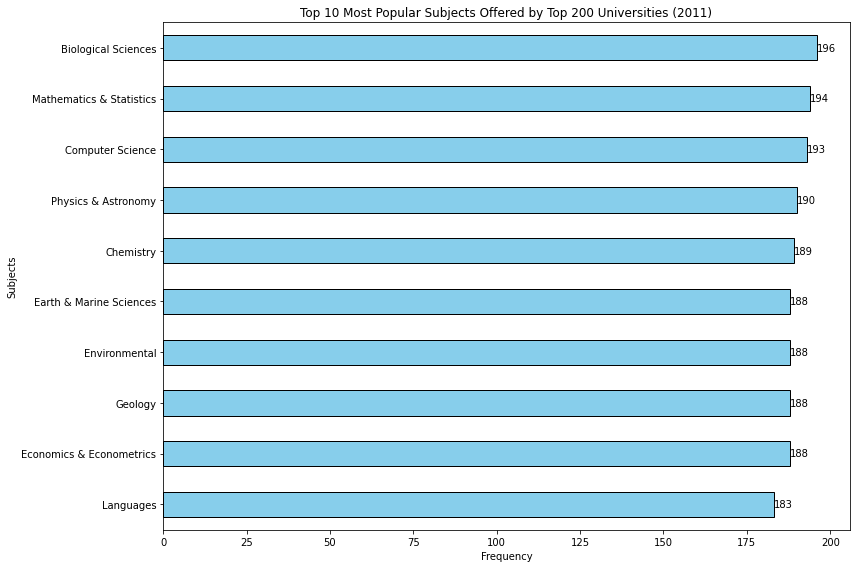

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset has columns 'Year', 'subjects_offered', and 'rank'
# If not, adjust the column names accordingly

# Filter the dataframe for the year 2011
uniranking_2011 = uniranking[uniranking['Year'] == pd.to_datetime('2011', format='%Y')]

# Check if there is data for 2011
if not uniranking_2011.empty:
    # Drop rows with null values in the 'subjects_offered' and 'rank' columns
    uniranking_cleaned_2011 = uniranking_2011.dropna(subset=['subjects_offered', 'rank'])

    # Select the top 200 universities based on rank
    top_200_universities_2011 = uniranking_cleaned_2011.head(200)

    # Split subjects and create a list of all subjects
    all_subjects_2011 = [subject.strip() for subjects_list in top_200_universities_2011['subjects_offered'].str.split(',') for subject in subjects_list]

    # Count the occurrences of each subject
    subject_counts_2011 = pd.Series(all_subjects_2011).value_counts()

    # Select the top 10 subjects
    top_10_subjects_2011 = subject_counts_2011.head(10)

    # Create a horizontal bar chart for 2011
    fig, ax = plt.subplots(figsize=(12, 8))
    bars_2011 = top_10_subjects_2011.sort_values().plot(kind='barh', color='skyblue', edgecolor='black', ax=ax)

    # Annotate each bar with its actual frequency count
    for bar in bars_2011.patches:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
                va='center', ha='left', fontsize=10, color='black')

    ax.set_title('Top 10 Most Popular Subjects Offered by Top 200 Universities (2011)')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Subjects')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the year 2011.")
    

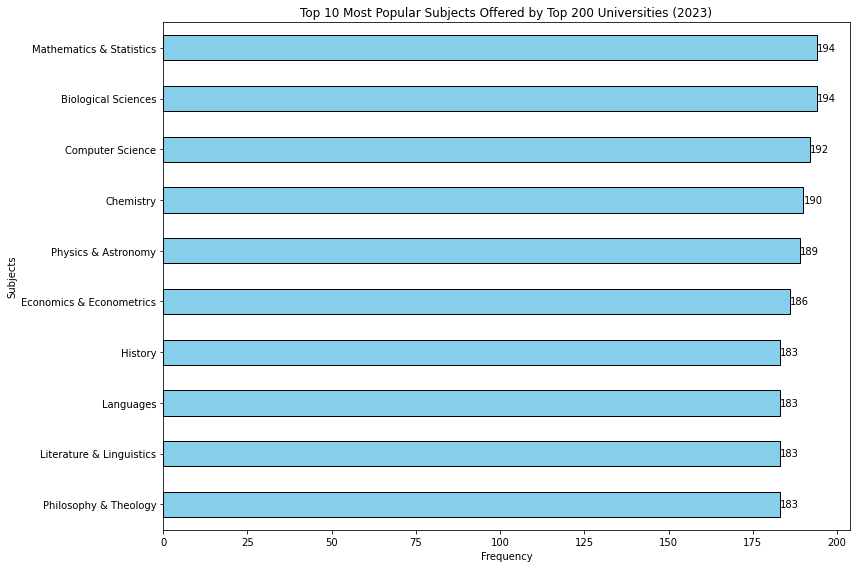

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset has columns 'Year', 'subjects_offered', and 'rank'
# If not, adjust the column names accordingly

# Filter the dataframe for the year 2023
uniranking_2023 = uniranking[uniranking['Year'] == pd.to_datetime('2023', format='%Y')]

# Check if there is data for 2023
if not uniranking_2023.empty:
    # Drop rows with null values in the 'subjects_offered' and 'rank' columns
    uniranking_cleaned_2023 = uniranking_2023.dropna(subset=['subjects_offered', 'rank'])

    # Select the top 200 universities based on rank
    top_200_universities_2023 = uniranking_cleaned_2023.head(200)

    # Split subjects and create a list of all subjects
    all_subjects_2023 = [subject.strip() for subjects_list in top_200_universities_2023['subjects_offered'].str.split(',') for subject in subjects_list]

    # Count the occurrences of each subject
    subject_counts_2023 = pd.Series(all_subjects_2023).value_counts()

    # Select the top 10 subjects
    top_10_subjects_2023 = subject_counts_2023.head(10)

    # Create a horizontal bar chart for 2023
    fig, ax = plt.subplots(figsize=(12, 8))
    bars_2023 = top_10_subjects_2023.sort_values().plot(kind='barh', color='skyblue', edgecolor='black', ax=ax)

    # Annotate each bar with its actual frequency count
    for bar in bars_2023.patches:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
                va='center', ha='left', fontsize=10, color='black')

    ax.set_title('Top 10 Most Popular Subjects Offered by Top 200 Universities (2023)')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Subjects')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the year 2023.")


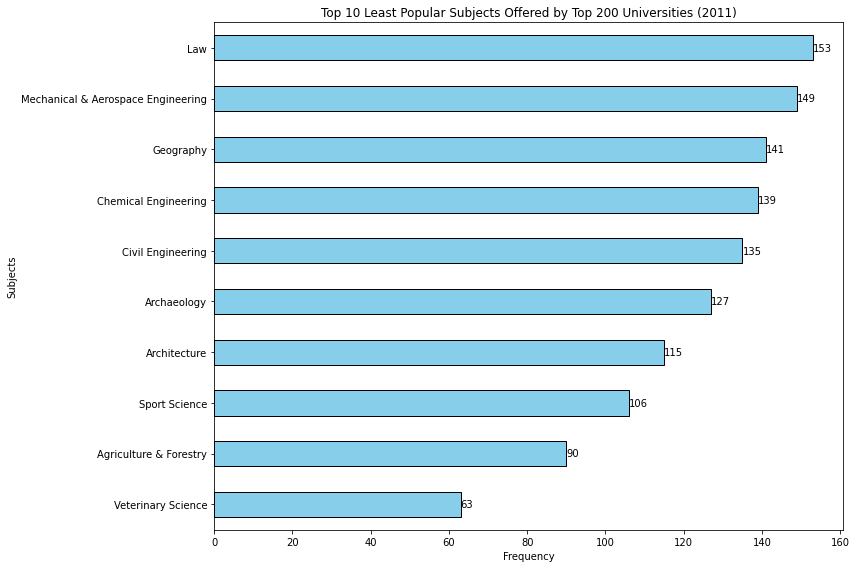

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset has columns 'Year', 'subjects_offered', and 'rank'
# If not, adjust the column names accordingly

# Filter the dataframe for the year 2011
uniranking_2011 = uniranking[uniranking['Year'] == pd.to_datetime('2011', format='%Y')]

# Check if there is data for 2011
if not uniranking_2011.empty:
    # Drop rows with null values in the 'subjects_offered' and 'rank' columns
    uniranking_cleaned_2011 = uniranking_2011.dropna(subset=['subjects_offered', 'rank'])

    # Select the top 200 universities based on rank
    top_200_universities_2011 = uniranking_cleaned_2011.head(200)

    # Split subjects and create a list of all subjects
    all_subjects_2011 = [subject.strip() for subjects_list in top_200_universities_2011['subjects_offered'].str.split(',') for subject in subjects_list]

    # Count the occurrences of each subject
    subject_counts_2011 = pd.Series(all_subjects_2011).value_counts()

    # Select the 10 least popular subjects
    least_10_subjects_2011 = subject_counts_2011.tail(10)

    # Create a horizontal bar chart for 2011
    fig, ax = plt.subplots(figsize=(12, 8))
    bars_2011 = least_10_subjects_2011.sort_values().plot(kind='barh', color='skyblue', edgecolor='black', ax=ax)

    # Annotate each bar with its actual frequency count
    for bar in bars_2011.patches:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
                va='center', ha='left', fontsize=10, color='black')

    ax.set_title('Top 10 Least Popular Subjects Offered by Top 200 Universities (2011)')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Subjects')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the year 2011.")


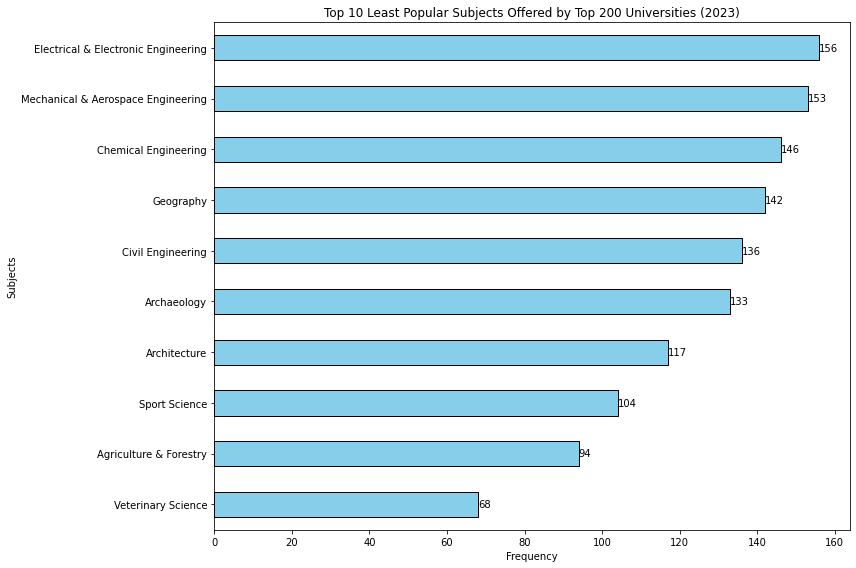

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset has columns 'Year', 'subjects_offered', and 'rank'
# If not, adjust the column names accordingly

# Filter the dataframe for the year 2023
uniranking_2023 = uniranking[uniranking['Year'] == pd.to_datetime('2023', format='%Y')]

# Check if there is data for 2023
if not uniranking_2023.empty:
    # Drop rows with null values in the 'subjects_offered' and 'rank' columns
    uniranking_cleaned_2023 = uniranking_2023.dropna(subset=['subjects_offered', 'rank'])

    # Select the top 200 universities based on rank
    top_200_universities_2023 = uniranking_cleaned_2023.head(200)

    # Split subjects and create a list of all subjects
    all_subjects_2023 = [subject.strip() for subjects_list in top_200_universities_2023['subjects_offered'].str.split(',') for subject in subjects_list]

    # Count the occurrences of each subject
    subject_counts_2023 = pd.Series(all_subjects_2023).value_counts()

    # Select the 10 least popular subjects
    least_10_subjects_2023 = subject_counts_2023.tail(10)

    # Create a horizontal bar chart for 2023
    fig, ax = plt.subplots(figsize=(12, 8))
    bars_2023 = least_10_subjects_2023.sort_values().plot(kind='barh', color='skyblue', edgecolor='black', ax=ax)

    # Annotate each bar with its actual frequency count
    for bar in bars_2023.patches:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
                va='center', ha='left', fontsize=10, color='black')

    ax.set_title('Top 10 Least Popular Subjects Offered by Top 200 Universities (2023)')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Subjects')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the year 2023.")
